<a href="https://colab.research.google.com/github/Mdimate/laboratorio_banco/blob/main/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('dataset_banco.csv')

In [ ]:
data = data.rename(columns={
                                  'age':        'edad',
                                  'job':        'trabajo',
                                  'marital':    'estado_civil',
                                  'education':  'educacion',
                                  'default':    'morosidad',
                                  'balance':    'saldo',
                                  'housing':    'vivienda',
                                  'loan':       'prestamo',
                                  'contact':    'contacto',
                                  'day':        'dia',
                                  'month':      'mes',
                                  'duration':   'duracion',
                                  'campaign':   'campana',
                                  'pdays':      'dias_previos',
                                  'previous':   'anterior',
                                  'poutcome':   'resultado',
                                  'y':          'respuesta'})

print(data.head())

   edad       trabajo estado_civil  educacion morosidad   saldo vivienda  \
0    58    management      married   tertiary        no  2143.0      yes   
1    44    technician       single  secondary        no    29.0      yes   
2    33  entrepreneur      married  secondary        no     2.0      yes   
3    47   blue-collar      married    unknown        no  1506.0      yes   
4    33       unknown       single    unknown        no     1.0       no   

  prestamo contacto  dia  mes  duracion  campana  dias_previos  anterior  \
0       no  unknown    5  may     261.0        1          -1.0         0   
1       no  unknown    5  may     151.0        1          -1.0         0   
2      yes  unknown    5  may      76.0        1          -1.0         0   
3       no  unknown    5  may      92.0        1          -1.0         0   
4       no  unknown    5  may     198.0        1          -1.0         0   

  resultado respuesta  
0   unknown        no  
1   unknown        no  
2   unknown   

In [ ]:
data.head()

,edad,trabajo,estado_civil,educacion,morosidad,saldo,vivienda,prestamo,contacto,dia,mes,duracion,campana,dias_previos,anterior,resultado,respuesta
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
categoricas = data.select_dtypes(include=['object']).columns.tolist()
numericas = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas categóricas:", categoricas)
print("Columnas numéricas:", numericas)

Columnas categóricas: ['trabajo', 'estado_civil', 'educacion', 'morosidad', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']
Columnas numéricas: ['edad', 'saldo', 'dia', 'duracion', 'campana', 'dias_previos', 'anterior']


In [ ]:
data.isna().sum()

,0
edad,0
trabajo,2
estado_civil,1
educacion,1
morosidad,0
saldo,2
vivienda,0
prestamo,0
contacto,0
dia,0


In [ ]:
data.dropna(inplace=True)
data.count()

,0
edad,45207
trabajo,45207
estado_civil,45207
educacion,45207
morosidad,45207
saldo,45207
vivienda,45207
prestamo,45207
contacto,45207
dia,45207


In [ ]:
cols_cat = ['trabajo', 'estado_civil', 'educacion', 'morosidad', 'vivienda',
       'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna trabajo: 18 subniveles
Columna estado_civil: 6 subniveles
Columna educacion: 10 subniveles
Columna morosidad: 2 subniveles
Columna vivienda: 2 subniveles
Columna prestamo: 6 subniveles
Columna contacto: 5 subniveles
Columna mes: 12 subniveles
Columna resultado: 6 subniveles
Columna respuesta: 2 subniveles


In [ ]:
pd.value_counts(data['trabajo'])

<ipython-input-45-000f7d650d22>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['trabajo'])


,count
trabajo,
blue-collar,9730
management,9454
technician,7597
admin.,5166
services,4153
retired,2263
self-employed,1578
entrepreneur,1487
unemployed,1303


In [ ]:
for col in cols_cat:
  print(f"\nConteo de registros por subnivel para la variable '{col}':")
  print(data[col].value_counts())



Conteo de registros por subnivel para la variable 'trabajo':
trabajo
blue-collar       9730
management        9454
technician        7597
admin.            5166
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

Conteo de registros por subnivel para la variable 'estado_civil':
estado_civil
married     27211
single      12786
divorced     5196
div.            7
Single          4
DIVORCED        3
Name: count, dtype: int64

Conteo de registros por subnivel para la variable 'educacion':
educacion
secondary    23192
tertiary     13301
primary       6848
unknown       1855
SECONDARY        3
Primary          2
sec.             2
UNK              2
Secondary        1
Tertiary         1
Name: count,

In [ ]:
desviaciones_estandar = data[['edad', 'saldo', 'dia', 'duracion', 'campana', 'dias_previos', 'anterior']].std()

desviaciones_estandar

,0
edad,12.037399
saldo,3924.491665
dia,8.323015
duracion,257.460759
campana,3.098058
dias_previos,100.103283
anterior,2.303341


In [ ]:
destd_pdays = data[['dias_previos']].std()

destd_pdays

,0
dias_previos,100.103283


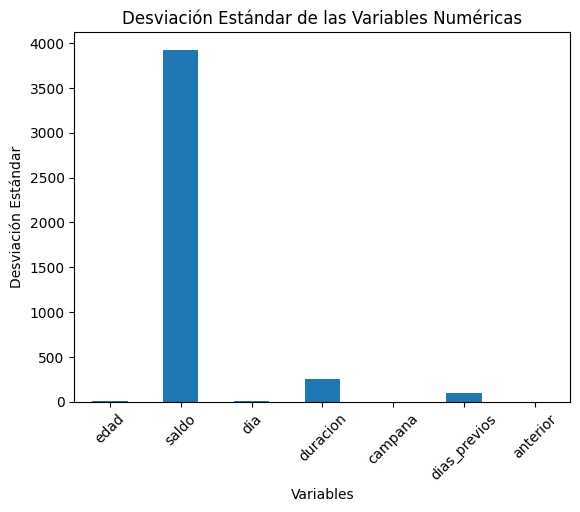

In [ ]:
desviaciones_estandar.plot(kind='bar')
plt.title('Desviación Estándar de las Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Desviación Estándar')
plt.xticks(rotation=45)
plt.show()

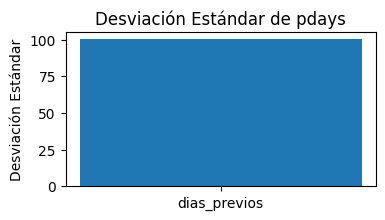

In [ ]:
plt.figure(figsize=(4, 2))  # Configura el tamaño de la figura
plt.bar('dias_previos', destd_pdays)  # Crea una barra para la desviación estándar de 'pdays'
plt.title('Desviación Estándar de pdays')
plt.ylabel('Desviación Estándar')
plt.show()

In [ ]:
media = data['dias_previos'].mean()

print("Promedio de dias de contacto:", media)

Promedio de dias de contacto: 40.17822461123277


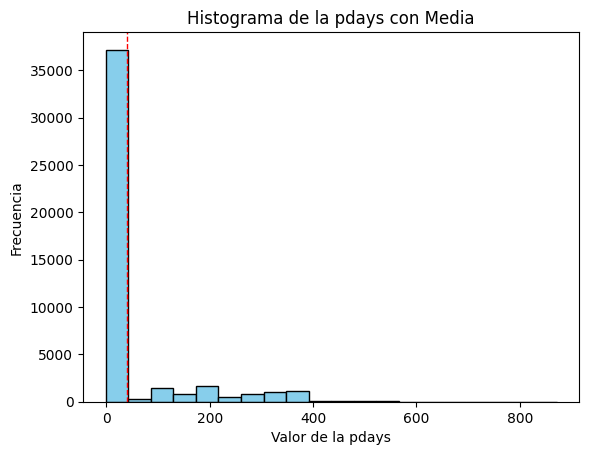

In [ ]:

plt.hist(data['dias_previos'], bins=20, color='skyblue', edgecolor='black')


plt.axvline(media, color='red', linestyle='dashed', linewidth=1)


plt.xlabel('Valor de la pdays')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con Media')


plt.show()

In [ ]:
#Mostramos la cantidad de registros antes de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
#Mostramos la cantidad de registros después de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


Column 'balance' not found in DataFrame.


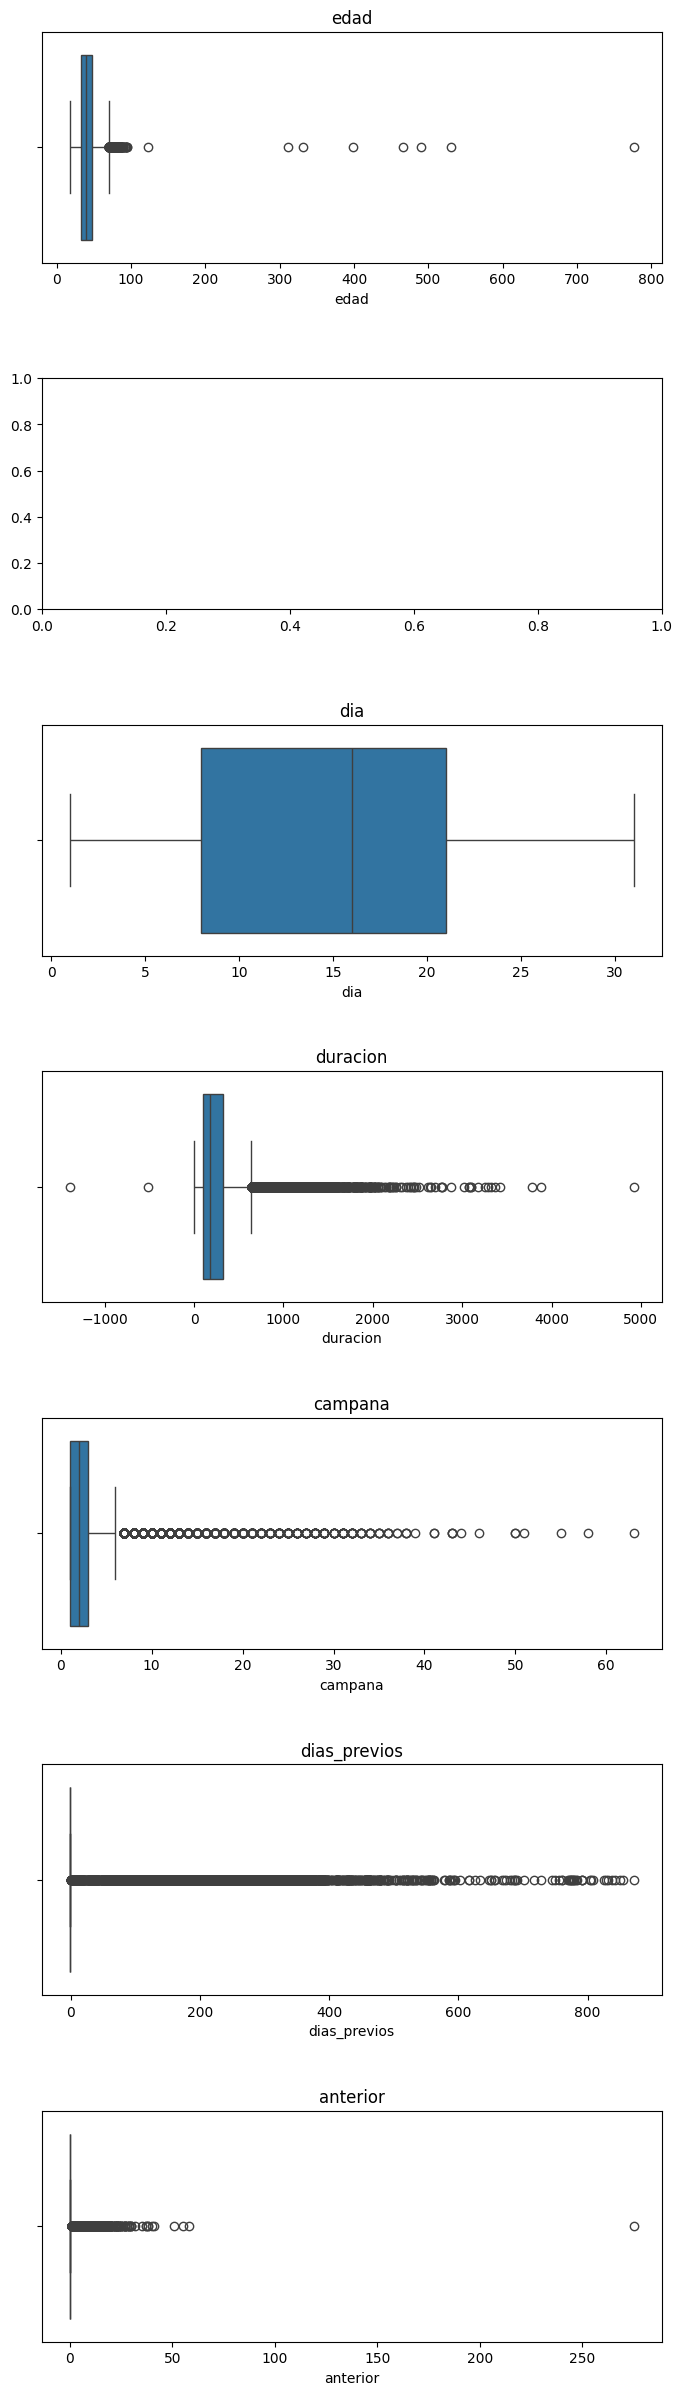

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['edad', 'balance', 'dia', 'duracion', 'campana',
            'dias_previos', 'anterior']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    # Check if the column exists in the DataFrame
    if col in data.columns:
        sns.boxplot(x=col, data=data, ax=ax[i])
        ax[i].set_title(col)
    else:
        print(f"Column '{col}' not found in DataFrame.")

In [ ]:
# Eliminar filas con "age">100
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['edad'] > 100].index)
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set después de eliminar registros de edad: (45195, 17)


In [ ]:
# Eliminar filas con "duration"<0
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data.drop(data[data['duracion'] < 0].index)
#data = data[data['duration']>0]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración: (45193, 17)


In [ ]:
#Eliminar filas con "previous">100
print(f'Tamaño del set antes de eliminar registros de previo: {data.shape}')
data = data.drop(data[data['dias_previos'] < 0].index)
#data = data[data['previous']>0]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de previo: (45193, 17)
Tamaño del set después de eliminar registros de duración: (8252, 17)


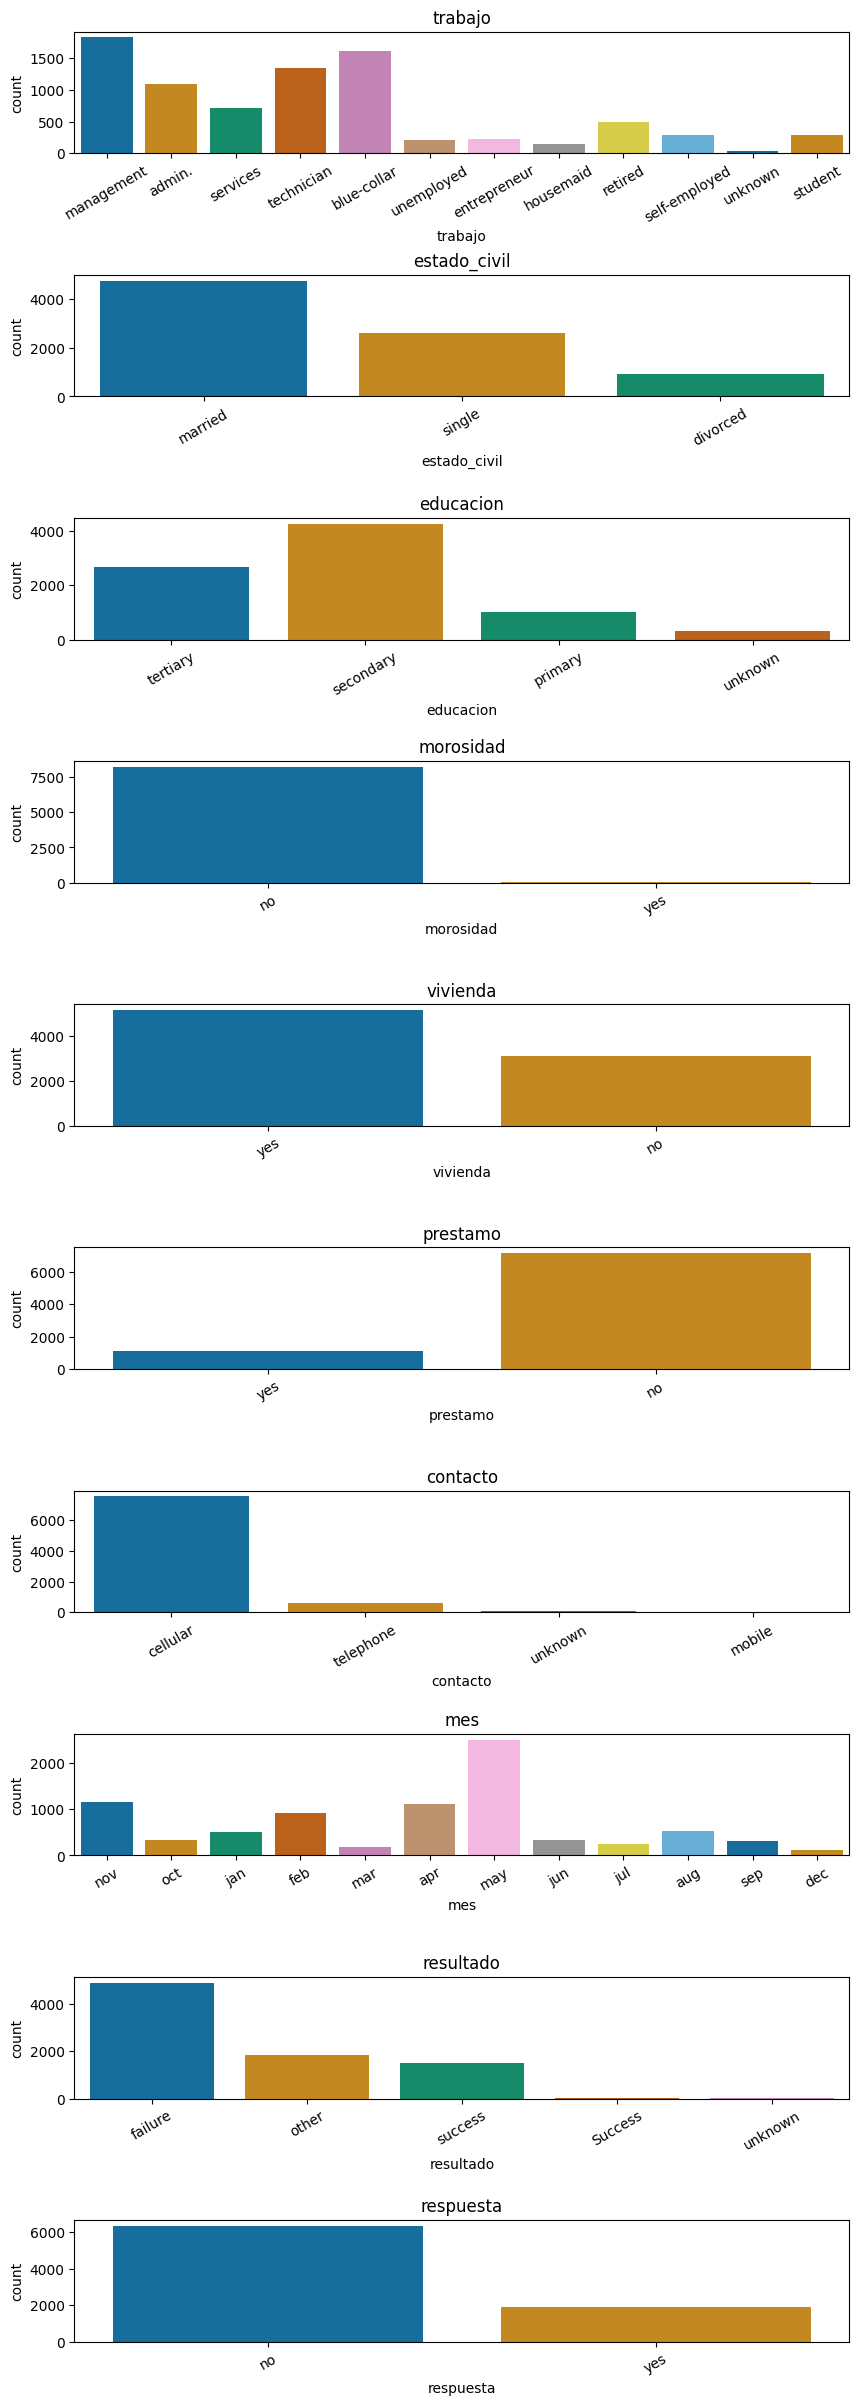

In [ ]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['trabajo', 'estado_civil', 'educacion', 'morosidad', 'vivienda',
       'prestamo', 'contacto', 'mes','resultado','respuesta']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette= 'colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

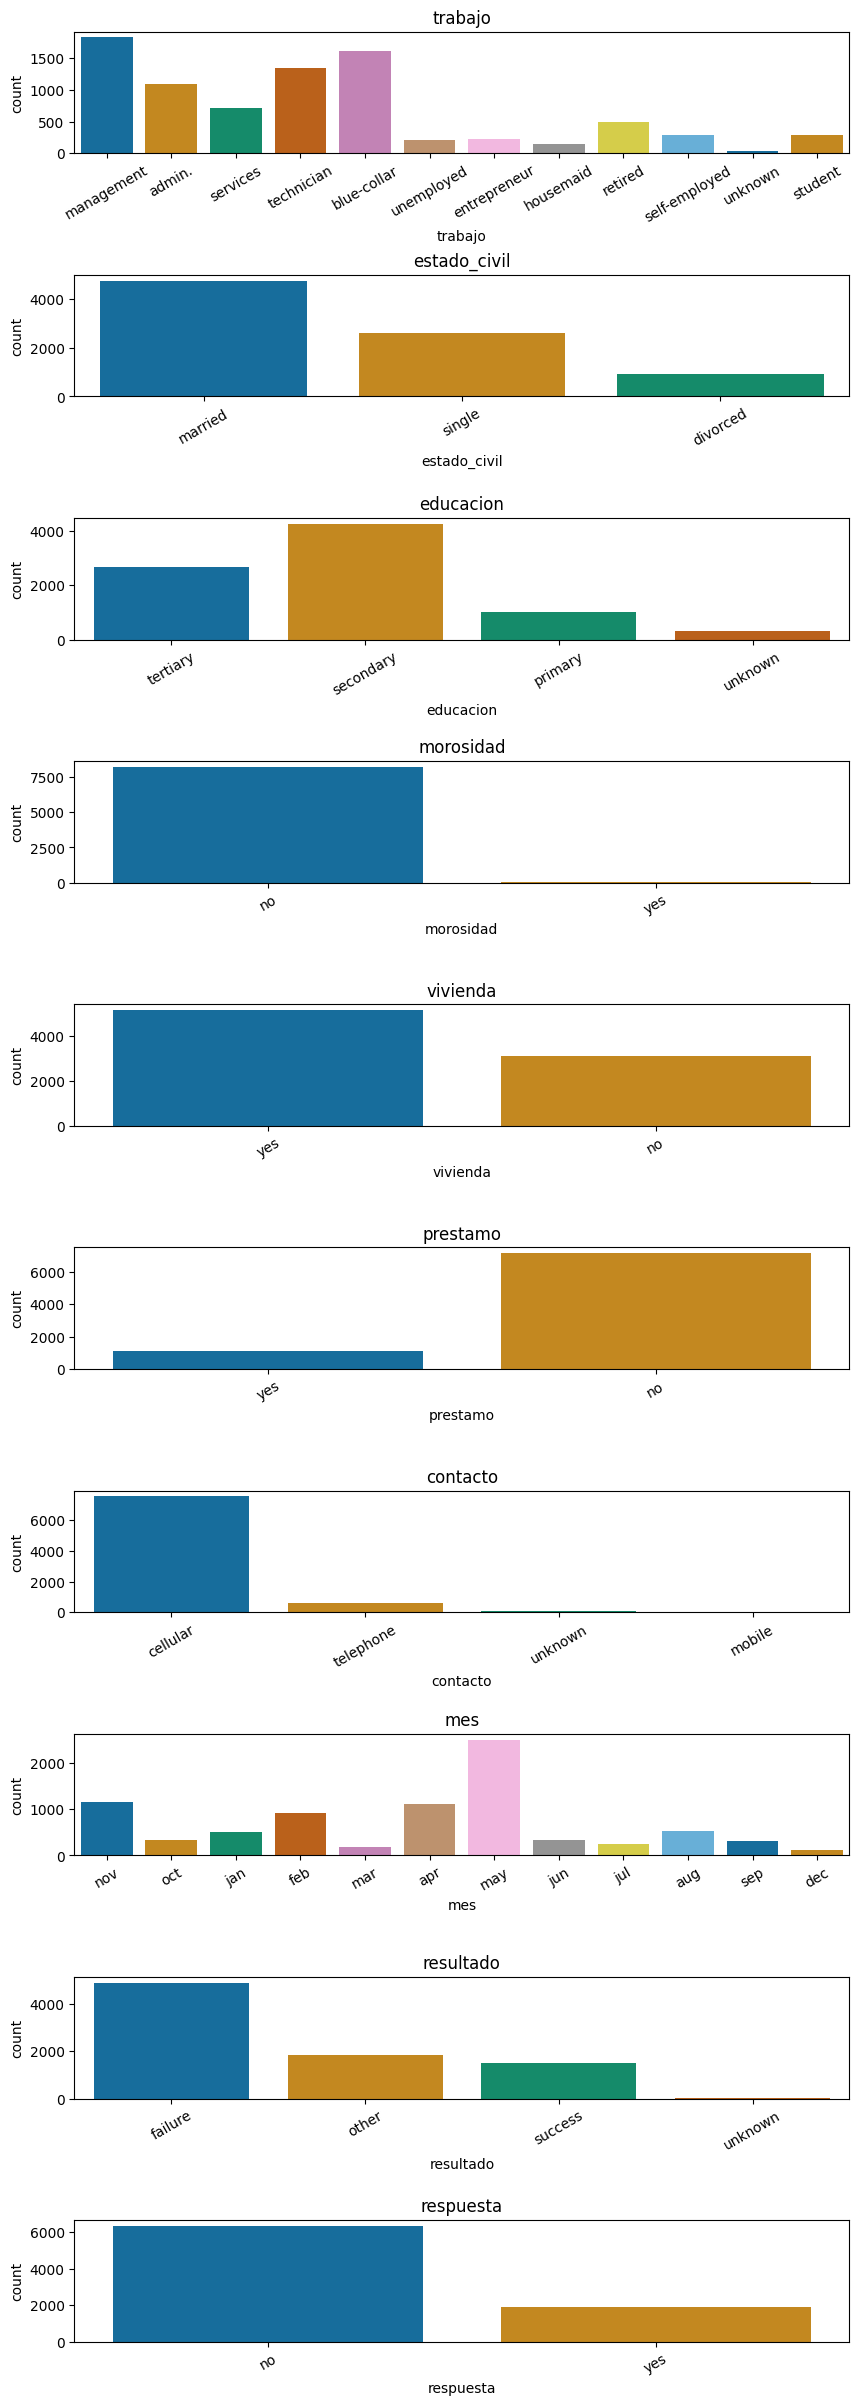

In [ ]:
for column in data.columns:
#Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

#generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

In [ ]:
# job: unificar admin. y administrative
print(data['trabajo'].unique())
data['trabajo'] = data['trabajo'].str.replace('admin.','administrative', regex=False)
print(data['trabajo'].unique())

['management' 'admin.' 'services' 'technician' 'blue-collar' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'unknown' 'student']
['management' 'administrative' 'services' 'technician' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'retired' 'self-employed'
 'unknown' 'student']


In [ ]:
# marital: unificar div. y divorced
print(data['estado_civil'].unique())
data['estado_civil'] = data['estado_civil'].str.replace('div.','divorced', regex=False)
print(data['estado_civil'].unique())

['married' 'single' 'divorced']
['married' 'single' 'divorced']


In [ ]:
# education: unificar sec. y secondary, unk y unknown
print(data['educacion'].unique())
data['education'] = data['educacion'].str.replace('sec.','secondary', regex=False)
data.loc[data['educacion']=='unk','educacion'] = 'unknown'
print(data['educacion'].unique())

['tertiary' 'secondary' 'primary' 'unknown']
['tertiary' 'secondary' 'primary' 'unknown']


In [ ]:
# contact: unificar telephone y phone
print(data['contacto'].unique())
data.loc[data['contacto']=='phone','contacto'] = 'telephone'
data.loc[data['contacto']=='mobile','contacto'] = 'cellular'
print(data['contacto'].unique())

['cellular' 'telephone' 'unknown']
['cellular' 'telephone' 'unknown']


In [ ]:
# poutcome: unificar unk y unknown
print(data['resultado'].unique())
data.loc[data['resultado']=='unk','resultado']='unknown'
print(data['resultado'].unique())

['failure' 'other' 'success' 'unknown']
['failure' 'other' 'success' 'unknown']
